In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# === Load Data ===
df = pd.read_csv('/content/only_chem_encoded.csv')

# === Define Features & Target ===
features = df.drop(['mean_income', 'socio_status', 'clustered_value', 'county', 'location', 'latitude', 'longitude', 'z_score'], axis=1)

# Targets
target_regression = df['mean_income']
target_classification = df['socio_status']

# === Split Data ===
X_train, X_test, y_train_reg, y_test_reg = train_test_split(features, target_regression, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(features, target_classification, test_size=0.2, random_state=42)


In [2]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-values for each feature vs target
def compute_pearson_correlations(X, y, target_name='Target'):
    results = []
    for col in X.columns:
        corr, p_val = pearsonr(X[col], y)
        results.append({'Feature': col, 'Pearson r': corr, 'p-value': p_val})

    pearson_df = pd.DataFrame(results).sort_values(by='Pearson r', key=abs, ascending=False)
    return pearson_df

# Example usage for regression target
pearson_reg = compute_pearson_correlations(X_train, y_train_reg, target_name='Mean Income')
print(pearson_reg)

# Example usage for classification target (if numeric coding like -1, 0, 1)
pearson_clf = compute_pearson_correlations(X_train, y_train_clf, target_name='Socio Status')
print(pearson_clf)


                                              Feature  Pearson r  \
3                                                year   0.193889   
0                                              method   0.088325   
47                              Dissolved oxygen (DO)   0.058396   
43                             Chemical oxygen demand   0.039525   
48                              Total volatile solids   0.038298   
45  Inorganic nitrogen (nitrate and nitrite) ***re...   0.028857   
37                                       Total solids   0.023649   
42                                Uranium-234/235/238   0.022060   
46                                           Nitrogen   0.019616   
10                             Total dissolved solids  -0.017997   
50                                           Hardness   0.017840   
44                                   Ammonia-nitrogen   0.015798   
1                                         measurement  -0.015224   
49                                             S

In [3]:
# Fit RandomForest for feature importance (can also use other tree models)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train_reg)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train_clf)

# Get importances
reg_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_regressor.feature_importances_}).sort_values(by='Importance', ascending=False)
clf_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_classifier.feature_importances_}).sort_values(by='Importance', ascending=False)

print("Regressor Feature Importances:\n", reg_importances)
print("\nClassifier Feature Importances:\n", clf_importances)


Regressor Feature Importances:
                                               Feature    Importance
1                                         measurement  4.866755e-01
3                                                year  1.723108e-01
2                                               month  1.183592e-01
0                                              method  4.841938e-02
15                                               Iron  8.474967e-03
36                                           Aluminum  7.964040e-03
30                                           Chloride  7.415721e-03
23                                             Sodium  6.958017e-03
4                                           Manganese  6.631403e-03
24                                            Sulfate  6.464264e-03
9                                              Silica  6.441465e-03
11                                          Magnesium  6.373128e-03
14                                            Nitrate  6.052015e-03
6               

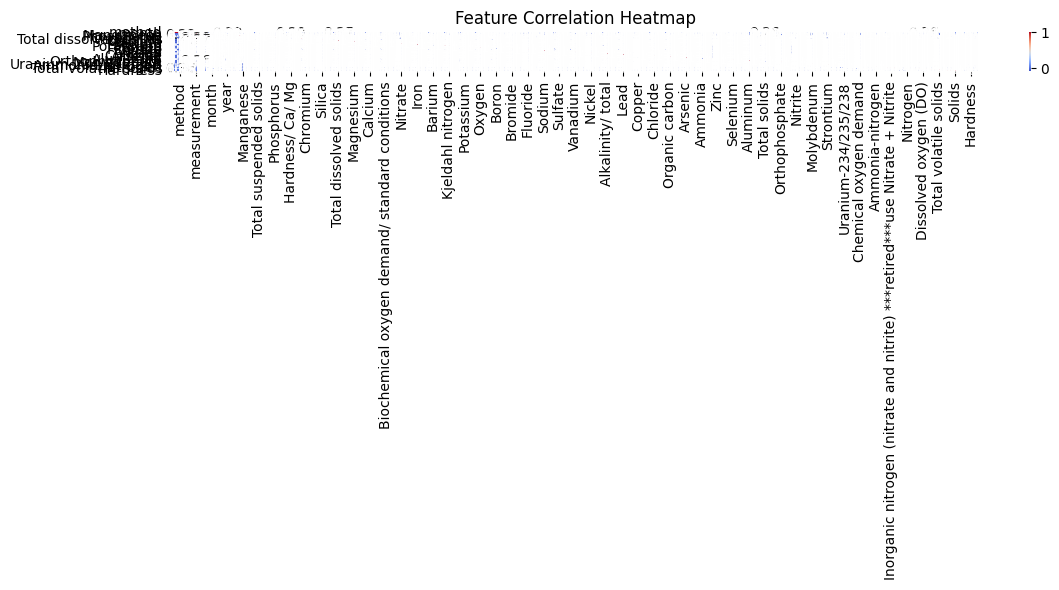

<ipython-input-4-0bba96fa394b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reg_importances.head(10), x='Importance', y='Feature', palette='Blues_r')


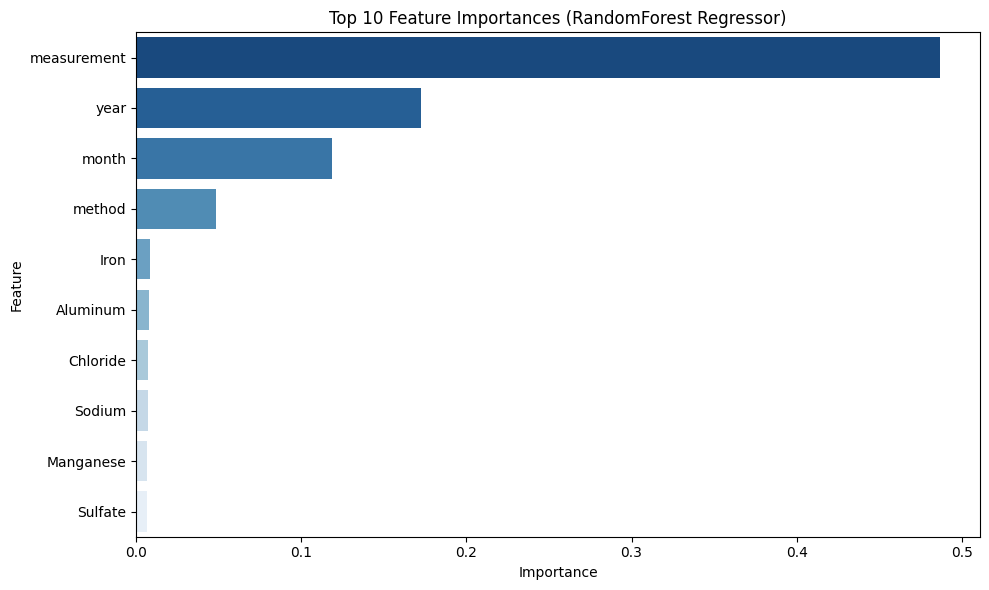

<ipython-input-4-0bba96fa394b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clf_importances.head(10), x='Importance', y='Feature', palette='Greens_r')


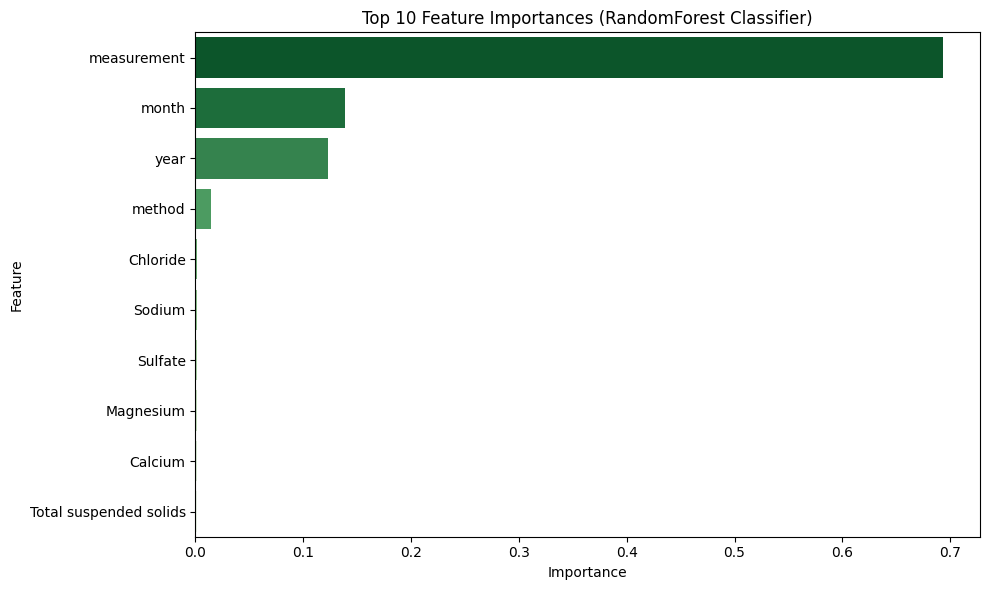

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Top 10 Feature Importances (Regression)
plt.figure(figsize=(10, 6))
sns.barplot(data=reg_importances.head(10), x='Importance', y='Feature', palette='Blues_r')
plt.title('Top 10 Feature Importances (RandomForest Regressor)')
plt.tight_layout()
plt.show()

# Top 10 Feature Importances (Classification)
plt.figure(figsize=(10, 6))
sns.barplot(data=clf_importances.head(10), x='Importance', y='Feature', palette='Greens_r')
plt.title('Top 10 Feature Importances (RandomForest Classifier)')
plt.tight_layout()
plt.show()
